In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import glob

In [0]:
# load the image
img = load_img("/content/drive/Shared drives/선빵팀 :)/최종_tuningstar 휠 이미지(2052개)/wheel/1001.jpg")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)


## 원본에서 변형된 이미지 저장하려면

it = datagen.flow(samples, batch_size=1,  에다가 

save_to_dir='/content/drive/My Drive', save_prefix='aug', save_format='jpg') 

붙여주기

<- 저장 이름 고안 필요

# Horizontal and Vertical Flip Augmentation & Random Flips


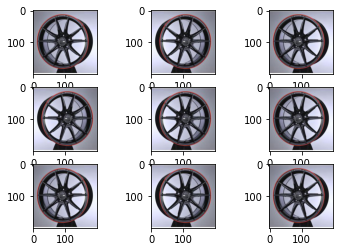

In [0]:

# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1) #저장하고플 때, 인자 save_to_dir='/content/drive/My Drive', save_prefix='aug', save_format='jpg' 붙여주기
# generate samples and plot
for i in range(9):    # 9 -> 수 조정 가능 ex) 6
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

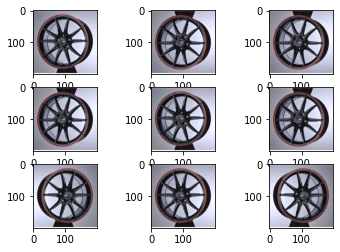

In [0]:
# Random Flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# configure batch size and retrieve one batch of images
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Random Rotation Augmentation

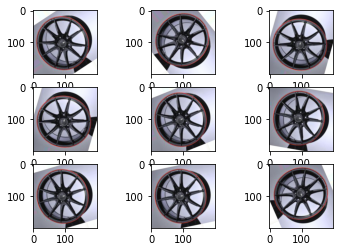

In [0]:

# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Random Brightness Augmentation

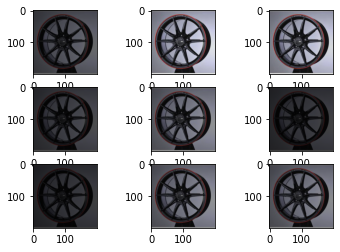

In [0]:

# example of brighting image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0]) # zca_whitening=True
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot  
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Random Zoom Augmentation

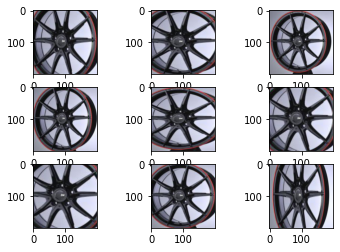

In [11]:

# example of zoom image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

#  Horizontal and Vertical Shift Augmentation

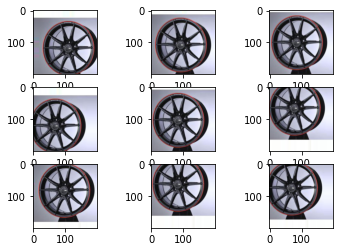

In [0]:

# example of vertical shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# create image data augmentation generator
#datagen = ImageDataGenerator(height_shift_range=0.5) # # width_shift_range=shift, height_shift_range=shift

shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift) #width_shift_range 왼쪽 오른쪽으로 옮긴다
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Gussian Noise

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("/content/drive/Shared drives/선빵팀 :)/최종_tuningstar 휠 이미지(2052개)/wheel/1001.jpg")[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),  #나중에 noise2 제외시키기
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))
plt.show()
plt.hist(noise.ravel(), bins=100)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 실패

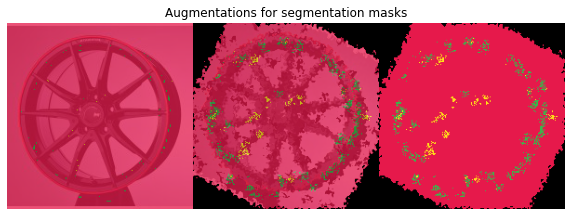

In [0]:
'''
# Import PIL
from PIL import Image
import numpy as np

# Import segmentation maps from imgaug
from imgaug.augmentables.segmaps import SegmentationMapOnImage

# Open image with mask
pil_mask = Image.open('/content/drive/Shared drives/선빵팀 :)/최종_tuningstar 휠 이미지(2052개)/wheel/1001.jpg')

# Convert mask to binary map
np_mask = np.array(pil_mask)
np_mask = np.clip(np_mask, 0, 1)

# Create segmentation map
segmap = np.zeros(image.shape, dtype=bool)
segmap[:] = np_mask
segmap = SegmentationMapOnImage(segmap, shape=image.shape)

# Initialize augmentations pipeline
seq = iaa.Sequential([
    iaa.CoarseDropout(0.1, size_percent=0.2), # coarse dropout
    iaa.Affine(rotate=(-30, 30)), # rotate the image
    iaa.ElasticTransformation(alpha=10, sigma=1) # elastc transform
])

# Apply augmentations for image and mask
image_aug, segmap_aug = seq(image=image, segmentation_maps=segmap)

# Import matplotlib for visualization
from matplotlib import pyplot as plt

# Visualize original image, augmented image, and segmentation map
side_by_side = np.hstack([
    segmap.draw_on_image(image), # show blend of original image and segmentation map
    segmap_aug.draw_on_image(image_aug),  # show blend of augmented image and segmentation map
    segmap_aug.draw()  # show only the augmented segmentation map
])

fig, ax = plt.subplots(figsize=(10, 7))
ax.axis('off')
plt.title('Augmentations for segmentation masks')
ax.imshow(side_by_side)
''' 

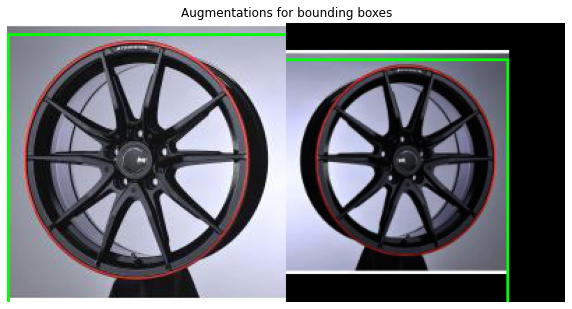

In [0]:
'''
# Import bounding boxes from imgaug
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

# Initialize the bounding box for the original image
# using helpers from imgaug package
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=1, x2=980, y1=9, y2=535)
], shape=image.shape)

# Define a simple augmentations pipeline for the image with bounding box
seq = iaa.Sequential([
    iaa.GammaContrast(1.5), # add contrast
    iaa.Affine(translate_percent={"x": 0.1}, scale=0.8), # translate the image
    iaa.Fliplr(p = 1.0) # apply horizontal flip
])

# Apply augmentations
image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)  

# Plot the initial and the augmented images with bounding boxes
# using helpers from imgaug package
side_by_side = np.hstack([
    bbs.draw_on_image(image, size=2), # blend the original image with bounding box
    bbs_aug.draw_on_image(image_aug, size=2) # blend the augmented image with bounding box
])

# Plot with matplotlib imshow()
fig, ax = plt.subplots(figsize=(10, 7))
ax.axis('off')
plt.title('Augmentations for bounding boxes')
ax.imshow(side_by_side)
'''